In [1]:
# Rafael Augusto Gaseta França - 1421436
# Pedro Ferreira Alves Pinto - 1320981

### Questões a explorar:

1. A diferença de horas trabalhadas entre americanos e não americanos é significativa?

* A proporção entre a salarios abaixo e acima de 50k entre os sexos muda quando se considera tambem a raça?

* Homens e mulheres apos o casamento, ou seja, divorciados, separados ou viuvos, trabalham mais do que os casados?
Obs.: Exemplos de categorias: "Homem - Separado", "Mulher - Casado"

* Verificar a proporção entre salários acima de 50k e abaixo de 50k considerando o nivel de escolaridade ( education ) e o  diferentes tipos de emprego ( empreendedor, empresa privada, governamental, etc )

In [2]:
import urllib
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.mode.chained_assignment = None # Desliga warnings de alterações em copias

In [3]:


# Data source:
# https://archive.ics.uci.edu/ml/datasets/Adult

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

data_raw=[]

addedLines = 0
skippedLines = 0

for line in urllib.request.urlopen(url):
    # from bytes-like object to string
    lined = line.decode()
    # separa cada linha em campos (separados por vírgula)
    field_lst = str(lined).split(', ')
    
    # inclui no data frame se o número de atributos for o esperado
    if len(field_lst)==15:
        data_raw.append(field_lst[0:15])
        addedLines += 1
    else:
        skippedLines += 1
        print('skipped data (error? blank line?):', line)

skipped data (error? blank line?): b'\n'


In [4]:
print( "Added Lines: " + str(addedLines) )
print( "Skipped Lines: " + str(skippedLines) )

Added Lines: 32561
Skipped Lines: 1


In [5]:
# cria dataframe pandas com dados


df = pd.DataFrame(data_raw)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [6]:
df.shape

(32561, 15)

In [7]:
# define colunas conforme definição do data set

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]

In [8]:
# ajusta os tipos das colunas numéricas

def str_to_int(c):
    if isinstance(c, int):
        return c
    else:
        try:
            return int(c)
        except:
            return None
  

df.age = df.age.apply(str_to_int)
df.fnlwgt = df.fnlwgt.apply(str_to_int)
df.education_num = df.education_num.apply(str_to_int)
df.capital_gain = df.capital_gain.apply(str_to_int)
df.capital_loss = df.capital_loss.apply(str_to_int)
df.hr_per_week = df.hr_per_week.apply(str_to_int)
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [9]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
type_employer    32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
education_num    32561 non-null int64
marital          32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capital_gain     32561 non-null int64
capital_loss     32561 non-null int64
hr_per_week      32561 non-null int64
country          32561 non-null object
income           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(None,
                 age        fnlwgt  education_num  capital_gain  capital_loss  \
 count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
 mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
 std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
 min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
 25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
 50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
 75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
 max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   
 
         hr_per_week  
 count  32561.000000  
 mean      40.437456  
 std       12.347429  
 min        1.000000  
 25%       40.000000  
 50%       40.000000  
 75%       45.000000  
 max       99.000000  )

### Questão 1

A diferença de horas trabalhadas entre americanos e não americanos é significativa?

In [10]:
# Questao 1.1 - Criando nova coluna que classifica o pais entre "United-States", "Developed" e "Developing"

# Obs.: Sabemos que existe uma forma mais simples de fazer essa separação ( como é feito em um ponto posterior ).
# Optamos por essa forma para exercitar a aplicação de funções.

def countryFilter_A( row ):
    if row['country'] == "United-States":
        return "United-States"
    
    if row['country'] == "Canada" or \
        row['country'] == "England" or \
        row['country'] == "France" or \
        row['country'] == "Germany" or \
        row['country'] == "Greece" or \
        row['country'] == "Holand-Netherlands" or \
        row['country'] == "Ireland" or \
        row['country'] == "Italy" or \
        row['country'] == "Japan" or \
        row['country'] == "Outlying-US(Guam-USVI-etc)" or \
        row['country'] == "Portugal":
        return "Developed"
    
    else:
        return "Developing"
        

df['country_type'] = df.apply (lambda row: countryFilter_A (row),axis=1)


In [11]:
# Checando quantidades

df_hours_per_week_country = df.groupby('country_type').size()
df_hours_per_week_country

country_type
Developed          617
Developing        2774
United-States    29170
dtype: int64

In [12]:
# Questao 1.2 - Sub Data Frames para plotagem

df_hrs_per_week_unitedstates = df[df.country_type == 'United-States']
df_hrs_per_week_developing = df[df.country_type == 'Developing']
df_hrs_per_week_developed = df[df.country_type == 'Developed']

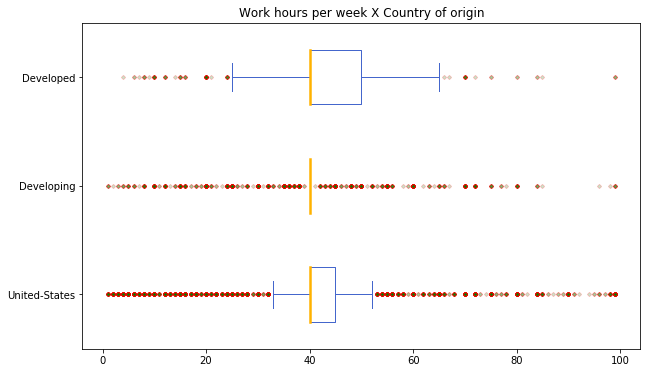

In [13]:
# Questao 1.3 - Box Plot

fig, ax = plt.subplots(figsize=(10,6))

boxPlot_hours_country = ax.boxplot([df_hrs_per_week_unitedstates.hr_per_week.values , 
           df_hrs_per_week_developing.hr_per_week.values,
           df_hrs_per_week_developed.hr_per_week.values ], 
           widths=0.5,
           sym='gD',
           labels=['United-States', 'Developing', 'Developed'],
           vert=False)

plt.setp(boxPlot_hours_country['fliers'],   markersize=3, markeredgecolor='#ff0000', alpha=0.2)
plt.setp(boxPlot_hours_country['caps'],     color='#4466CC')
plt.setp(boxPlot_hours_country['boxes'],    color='#4466CC')
plt.setp(boxPlot_hours_country['whiskers'], color='#4466CC')
plt.setp(boxPlot_hours_country['medians'], color='#ffb200', linestyle='-',linewidth=2.5 )



ax.set_title('Work hours per week X Country of origin')

pass


In [14]:
# Questao 1.4 - Metricas 

df_hours_per_week_country = df.groupby('country_type').agg( {'hr_per_week':['count','mean'] } )
df_hours_per_week_country


hr_per_week           
                    count       mean
country_type                        
Developed             617  41.820097
Developing           2774  40.021629
United-States       29170  40.447755

### Questão 1, Conclusão

A diferença da média das horas trabalhadas é muito baixa, tendendo ligeiramente para cima nos estrangeiros. A variação na quantidade de horas trabalhadas dos estrangeiros é maior, mas vale ressaltar que a quantidade de dados presentes para estrangeiros também é menor.

### Questão 2

A proporção entre a salarios abaixo e acima de 50k entre os sexos muda quando se considera tambem a raça?


In [15]:
# Questao 2.1 - Preparando Dados

df_sex_race_income = df.groupby(['race','sex','income']).size()
df_sex_race_income = df_sex_race_income.unstack(['income' ]).fillna(0)
df_sex_race_income


income                     <=50K\n  >50K\n
race               sex                    
Amer-Indian-Eskimo Female      107      12
                   Male        168      24
Asian-Pac-Islander Female      303      43
                   Male        460     233
Black              Female     1465      90
                   Male       1272     297
Other              Female      103       6
                   Male        143      19
White              Female     7614    1028
                   Male      13085    6089

In [16]:
# Questao 2.2 - Calculando proporcoes

def incomeProportion_A1( row ):
    return 100 * row['<=50K\n'] / ( row['<=50K\n'] + row['>50K\n'] )

def incomeProportion_A2( row ):
    return 100 * row['>50K\n'] / ( row['<=50K\n'] + row['>50K\n'] )


df_sex_race_income['<= 50k factor'] = df_sex_race_income.apply (lambda row: incomeProportion_A1 (row),axis=1)
df_sex_race_income['> 50k factor'] = df_sex_race_income.apply (lambda row: incomeProportion_A2 (row),axis=1)

df_sex_race_income = df_sex_race_income.drop(['<=50K\n', '>50K\n'], axis=1)

df_sex_race_income


income                     <= 50k factor  > 50k factor
race               sex                                
Amer-Indian-Eskimo Female      89.915966     10.084034
                   Male        87.500000     12.500000
Asian-Pac-Islander Female      87.572254     12.427746
                   Male        66.378066     33.621934
Black              Female      94.212219      5.787781
                   Male        81.070746     18.929254
Other              Female      94.495413      5.504587
                   Male        88.271605     11.728395
White              Female      88.104605     11.895395
                   Male        68.243455     31.756545

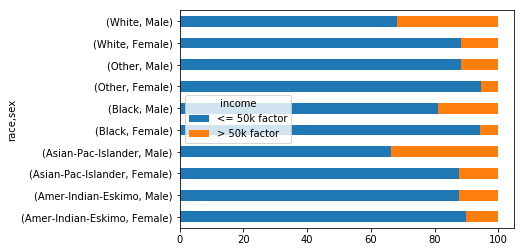

In [17]:
# Questao 2.2 - Calculando proporcoes

df_sex_race_income.plot(kind='barh', stacked=True)

### Questão 2, conclusão

No geral, a proporção de mulheres que ganham acima de 50k é menor do que a dos homens. Essa fator é agravado ainda mais quando consideramos o fator racial, onde podemos observar que negros, no geral, ganham meno. E é possivel observar que, acumulando os dois fatores, mulheres negras ganham menos do que mulheres brancas.

### Questão 3

Homens e mulheres apos o casamento, ou seja, divorciados, separados ou viuvos, trabalham mais do que os casados?
Obs.: Exemplos de categorias: "Homem - Separado", "Mulher - Casado"

In [18]:
# Questao 3.1

df_marital = df[['marital','sex', 'hr_per_week']]
df_marital.head()

,marital,sex,hr_per_week
0,Never-married,Male,40
1,Married-civ-spouse,Male,13
2,Divorced,Male,40
3,Married-civ-spouse,Male,40
4,Married-civ-spouse,Female,40


In [19]:
df_marital.shape

(32561, 3)

In [20]:
df_marital = df_marital[df_marital['marital'] != 'Never-married']
df_marital.shape

(21878, 3)

In [21]:
df_marital['marital'].loc[df_marital['marital'].isin(
    ['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'])
    ] = 'married'
df_marital['marital'].loc[df_marital['marital'] != 'married'] = 'pos-married'
df_marital.head()

,marital,sex,hr_per_week
1,married,Male,13
2,pos-married,Male,40
3,married,Male,40
4,married,Female,40
5,married,Female,40


In [22]:
df_married = df_marital[df_marital.marital == 'married']
df_pos_married = df_marital[df_marital.marital == 'pos-married']
df_married_men = df_married[df_married.sex == 'Male']
df_not_married_men = df_pos_married[df_pos_married.sex == 'Male']
df_married_women = df_married[df_married.sex == 'Female']
df_not_married_women = df_pos_married[df_pos_married.sex == 'Female']

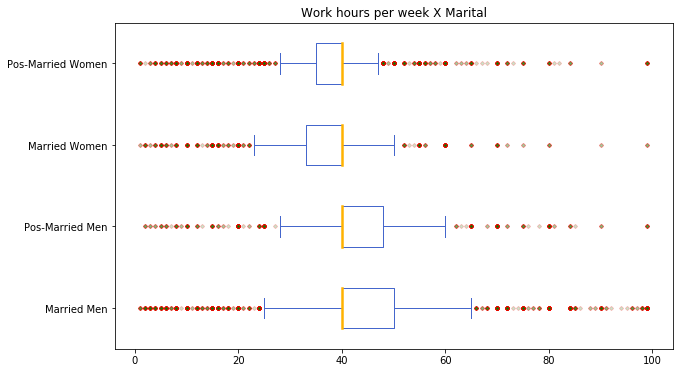

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

boxPlot_hours_marital = ax.boxplot([
    df_married_men.hr_per_week.values, 
    df_not_married_men.hr_per_week.values,
    df_married_women.hr_per_week.values, 
    df_not_married_women.hr_per_week.values
], 
    widths=0.5,
    sym='gD',
    labels=['Married Men', 'Pos-Married Men', 'Married Women', 'Pos-Married Women'],
    vert=False
)

plt.setp(boxPlot_hours_marital['fliers'],   markersize=3, markeredgecolor='#ff0000', alpha=0.2)
plt.setp(boxPlot_hours_marital['caps'],     color='#4466CC')
plt.setp(boxPlot_hours_marital['boxes'],    color='#4466CC')
plt.setp(boxPlot_hours_marital['whiskers'], color='#4466CC')
plt.setp(boxPlot_hours_marital['medians'], color='#ffb200', linestyle='-',linewidth=2.5 )

ax.set_title('Work hours per week X Marital')

plt.show()

### Questão 3, Conclusão

Em média, as horas trabalhadas por semana são aproximadas.

Porém a distribuição tende para menos horas no caso das mulheres e mais horas no caso dos homens.

É interessante observar que os dados são um pouco mais homogeneos quando a pessoa é separada/viuva.

Vale a pena conferir essa distribuição por idade, e cosiderar também a presença de filhos ou não.

### Questão 4
Verificar a proporção entre salários acima de 50k e abaixo de 50k considerando o nivel de escolaridade ( education ) e o  diferentes tipos de emprego ( empreendedor, empresa privada, governamental, etc )

In [24]:
# Questão 4.1 - Obtendo apenas a parte que nos interessa do Data Frame original
df_edu_workclass = df[['education','type_employer', 'income']]
df_edu_workclass.head()


,education,type_employer,income
0,Bachelors,State-gov,<=50K\n
1,Bachelors,Self-emp-not-inc,<=50K\n
2,HS-grad,Private,<=50K\n
3,11th,Private,<=50K\n
4,Bachelors,Private,<=50K\n


In [25]:
# Questão 4.2 - Alterando os valores do grau de escolaridade para facilitar a ordenação do menor para o maior

"""
Dado que esta ordenação é só para facilitar a visualização dos dados:
- Graus equivalentes, como Bachelor e Professional-School, bastam estarem em sequencia
- Titulos que nao compreendemos, como Assoc-acdm e Assoc-voc, serão considerados rank 0

Ordenacao prevista:
Assoc-acdm
Assoc-voc
Preschool
1st-4th
5th-6th
7th-8th
9th
10th
11th
12th
HS-grad
Some-college
Bachelors
Prof-school
Masters
Doctorate

"""

df_edu_workclass.loc[ df_edu_workclass['education'] == 'Assoc-acdm' , 'education' ] = '00: Assoc-acdm'
df_edu_workclass.loc[ df_edu_workclass['education'] == 'Assoc-voc' , 'education' ] = '00: Assoc-voc'
df_edu_workclass.loc[ df_edu_workclass['education'] == 'Preschool' , 'education' ] = '01: Preschool'
df_edu_workclass.loc[ df_edu_workclass['education'] == '1st-4th' , 'education' ] = '02: 1st-4th'
df_edu_workclass.loc[ df_edu_workclass['education'] == '5th-6th' , 'education' ] = '03: 5th-6th'
df_edu_workclass.loc[ df_edu_workclass['education'] == '7th-8th' , 'education' ] = '04: 7th-8th'
df_edu_workclass.loc[ df_edu_workclass['education'] == '9th' , 'education' ] = '05: 9th'
df_edu_workclass.loc[ df_edu_workclass['education'] == '10th' , 'education' ] = '06: 10th'
df_edu_workclass.loc[ df_edu_workclass['education'] == '11th' , 'education' ] = '07: 11th'
df_edu_workclass.loc[ df_edu_workclass['education'] == '12th' , 'education' ] = '08: 12th'
df_edu_workclass.loc[ df_edu_workclass['education'] == 'HS-grad' , 'education' ] = '09: HS-grad'
df_edu_workclass.loc[ df_edu_workclass['education'] == 'Some-college' , 'education' ] = '10: Some-college'
df_edu_workclass.loc[ df_edu_workclass['education'] == 'Bachelors' , 'education' ] = '11: Bachelors'
df_edu_workclass.loc[ df_edu_workclass['education'] == 'Prof-school' , 'education' ] = '12: Prof-school'
df_edu_workclass.loc[ df_edu_workclass['education'] == 'Masters' , 'education' ] = '13: Masters'
df_edu_workclass.loc[ df_edu_workclass['education'] == 'Doctorate' , 'education' ] = '14: Doctorate'

df_edu_workclass.head()

,education,type_employer,income
0,11: Bachelors,State-gov,<=50K\n
1,11: Bachelors,Self-emp-not-inc,<=50K\n
2,09: HS-grad,Private,<=50K\n
3,07: 11th,Private,<=50K\n
4,11: Bachelors,Private,<=50K\n


In [26]:
# Questão 4.3 - Agrupando dados

# Funcao de agregação que calcula o fator: ( |>50k| / |Total| )
def agg_IncomeGreaterFactor(x):
    greaterCount = 0
    lesserCount = 0
    total = 0
    
    for income in x:
        total += 1
        if income == "<=50K\n":
            lesserCount += 1
        else:
            greaterCount += 1
            
    if total == 0:
        return 0
    else:    
        return 100 * greaterCount / total

# Funcao de agregação que calcula o total
def agg_size(x):
    return len(x)




se_edu_workclass = df_edu_workclass.groupby( ['education','type_employer']).agg([agg_IncomeGreaterFactor,agg_size])
se_edu_workclass = se_edu_workclass.reset_index()
se_edu_workclass.head()

education type_employer                  income         
                                agg_IncomeGreaterFactor agg_size
0  00: Assoc-acdm             ?               12.765957       47
1  00: Assoc-acdm   Federal-gov               34.545455       55
2  00: Assoc-acdm     Local-gov               31.818182       88
3  00: Assoc-acdm       Private               23.319616      729
4  00: Assoc-acdm  Self-emp-inc               51.428571       35

In [27]:
# Questão 4.4 - Renomeando colunas

se_edu_workclass.columns = ['education', 'type_employer', '>50k_factor', 'count']
se_edu_workclass.head()

,education,type_employer,>50k_factor,count
0,00: Assoc-acdm,?,12.765957,47
1,00: Assoc-acdm,Federal-gov,34.545455,55
2,00: Assoc-acdm,Local-gov,31.818182,88
3,00: Assoc-acdm,Private,23.319616,729
4,00: Assoc-acdm,Self-emp-inc,51.428571,35


In [28]:
# Questão 4.5 - Preparando dados para plotar

import seaborn as sns

# Criando Pivot Table para usar no heatMap
pivot_edu_workclass = se_edu_workclass.pivot(index='education', columns='type_employer', values='>50k_factor' )

# Removendo Dados que Nao Sabemos Avaliar
pivot_edu_workclass.drop(['Never-worked'], axis = 1, inplace = True)
pivot_edu_workclass.drop(['Without-pay'], axis = 1, inplace = True)
pivot_edu_workclass.drop(['?'], axis = 1, inplace = True)

pivot_edu_workclass.drop(['00: Assoc-acdm'], axis = 0, inplace = True)
pivot_edu_workclass.drop(['00: Assoc-voc'], axis = 0, inplace = True)

# Trocando NaN por 0
pivot_edu_workclass.fillna(0, inplace=True)

pivot_edu_workclass

type_employer,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
education,,,,,,
01: Preschool,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
02: 1st-4th,0.000000,0.000000,3.676471,0.000000,7.692308,0.000000
03: 5th-6th,0.000000,11.111111,2.631579,50.000000,21.052632,0.000000
04: 7th-8th,0.000000,3.571429,4.245283,35.714286,14.893617,0.000000
05: 9th,33.333333,13.043478,4.651163,0.000000,11.764706,0.000000
06: 10th,0.000000,3.225806,6.762590,15.789474,10.447761,15.384615
07: 11th,11.111111,5.555556,4.875406,28.571429,11.666667,7.142857
08: 12th,0.000000,10.526316,6.906907,14.285714,15.789474,20.000000
09: HS-grad,27.756654,17.892644,14.383033,42.652330,20.669746,18.283582


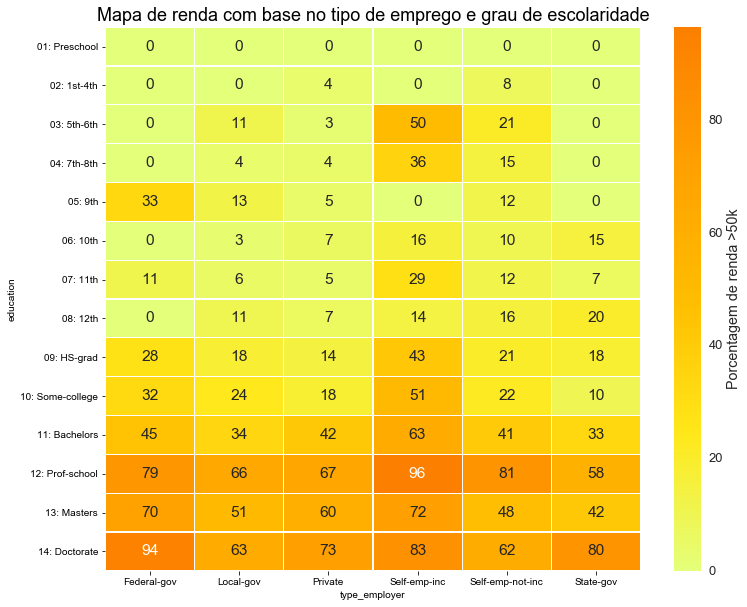

In [29]:
# Questão 4.6 - Plotando heatmap

# Configurando Tamanho e Titulos
fig , ax = plt.subplots( figsize = (12,10) )

title = "Mapa de renda com base no tipo de emprego e grau de escolaridade"

plt.title(title,fontsize=18)
ttl = ax.title
#ttl.set_position([0.5, 1.05])

# Cores a testar: hot , Wistia , gist_heat , viridis , plasma , inferno , magma
sns.set(font_scale=1.3)
sns.heatmap( pivot_edu_workclass , 
            annot=True , 
            fmt = ".0f" , 
            cmap="Wistia" , 
            linewidths=0.2,
            cbar_kws={'label': 'Porcentagem de renda >50k' },
            ax=ax )

plt.show()



Aparentemente na categoria ** Prof-school x Self-emp-inc ** a maioria ganha de 50k. Vamos checar esse fato.

In [30]:
# Questão 4.6 - Confirmando dados

# Ordenando o DataSet anterior pelo porcentagemde renda mais alta
check_edu_workclass = se_edu_workclass.sort_values(by=['>50k_factor', 'count'], ascending=False)

check_edu_workclass.head()


,education,type_employer,>50k_factor,count
100,12: Prof-school,Self-emp-inc,96.296296,81
111,14: Doctorate,Federal-gov,93.750000,16
114,14: Doctorate,Self-emp-inc,82.857143,35
101,12: Prof-school,Self-emp-not-inc,80.916031,131
116,14: Doctorate,State-gov,79.775281,89


### Questão 4, Conclusão

Como esperado, no geral, o grau de escolaridade afeta as chances de ter uma renda mais alta.

** Observações interessantes: **

-Entre os empresários( self-emp-inc ) as rendas mais altas não foram observados no grau de escolaridade mais alta.

-Também entre os empresários é aonde se observa as maiores chances de salários mais altos para pessoas com niveis mais baixos de escolaridade. 

-No o nivel de doutor, trabalhando para o governo federal, as quantidade rendas altas observadas é praticadamente a mesma do empresário apenas com graduação.
